In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 130s 1us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

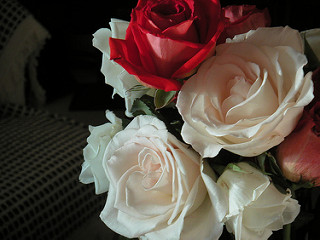

In [7]:
PIL.Image.open(str(roses[1]))

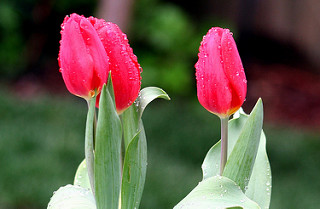

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## Create Image Dictionary

In [9]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flower_image_map = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

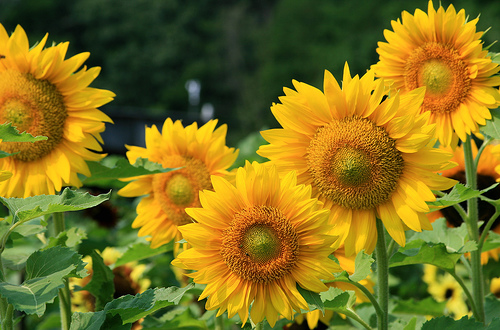

In [11]:
flower_images_dict['sunflowers'][0]
PIL.Image.open(str(flower_images_dict['sunflowers'][0]))

In [ ]:
for flower_name, images in flower_images_dict.items():
    print(flower_name)
    print(images)

In [13]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [14]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [15]:
x = []
y = []

In [16]:
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flower_image_map[flower_name])

In [17]:
x = np.array(x)
y = np.array(y)

## Train, Test split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

## Preprocessing

In [19]:
x_train_scaled = (x_train.astype('float16')) / 255.0
x_test_scaled = (x_test.astype('float16')) / 255.0


## Build CNN

In [20]:
number_of_classes = 5

model = Sequential()
model.add(layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_of_classes))

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(x_train_scaled, y_train,validation_data=(x_test_scaled,y_test), epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.3970 - loss: 1.4604 - val_accuracy: 0.5436 - val_loss: 1.0603
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.6196 - loss: 0.9615 - val_accuracy: 0.6349 - val_loss: 0.9402
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.7301 - loss: 0.7207 - val_accuracy: 0.6635 - val_loss: 0.8846
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.8408 - loss: 0.4480 - val_accuracy: 0.6458 - val_loss: 0.9745
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.9036 - loss: 0.2959 - val_accuracy: 0.6608 - val_loss: 1.1797
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.9521 - loss: 0.1562 - val_accuracy: 0.6608 - val_loss: 1.2016
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.9800 - loss: 0.0872 - val_accuracy: 0.6471 - val_loss: 1.5790
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.9903 - loss: 0.0446 - val_accu

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

predictions = model.predict(x_test_scaled)
y_pred = np.argmax(predictions, axis=1)

predictions_train = model.predict(x_train_scaled)
y_pred_train = np.argmax(predictions_train, axis=1)


print("Validation Score: ", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ",accuracy_score(y_train, y_pred_train)*100)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
Validation Score:  66.34877384196184
Train Score:  100.0


To determine if the model is overfitting, we can compare the training accuracy and validation accuracy. If the training accuracy is significantly higher than the validation accuracy, it indicates overfitting.

Validation Score:  66.07629427792916</br>
Train Score:  99.96594005449592

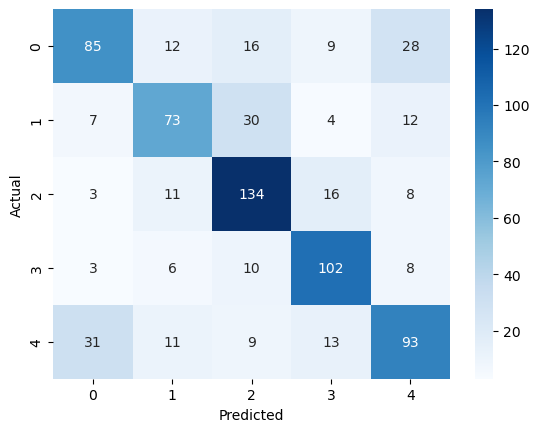

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Data Augmentation

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


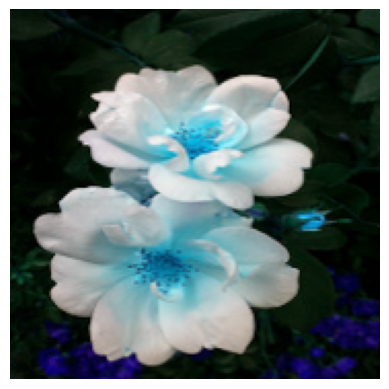

In [27]:
plt.axis('off')
plt.imshow(x[0])

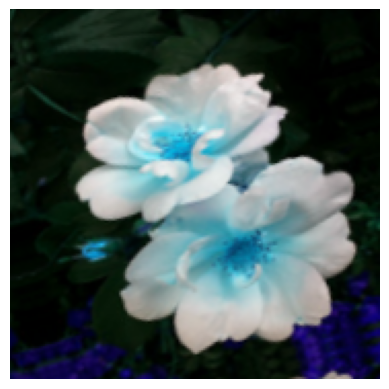

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

## After Augmentation

In [29]:
number_of_classes = 5

model = Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_of_classes))

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(x_train_scaled, y_train,validation_data=(x_test_scaled,y_test), epochs=30)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.2709 - loss: 1.7512 - val_accuracy: 0.5027 - val_loss: 1.1724
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.5189 - loss: 1.1709 - val_accuracy: 0.5586 - val_loss: 1.0947
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.6166 - loss: 0.9746 - val_accuracy: 0.6322 - val_loss: 0.9551
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.6410 - loss: 0.9311 - val_accuracy: 0.6580 - val_loss: 0.8841
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.6453 - loss: 0.8762 - val_accuracy: 0.6512 - val_loss: 0.9059
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.6852 - loss: 0.8138 - val_accuracy: 0.6730 - val_loss: 0.8390
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.7195 - loss: 0.7298 - val_accuracy: 0.6907 - val_loss: 0.7871
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.7427 - loss: 0.7005 - val_accu

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

predictions = model.predict(x_test_scaled)
y_pred = np.argmax(predictions, axis=1)

predictions_train = model.predict(x_train_scaled)
y_pred_train = np.argmax(predictions_train, axis=1)


print("Validation Score: ", accuracy_score(y_test, y_pred) * 100)
print("Train Score: ",accuracy_score(y_train, y_pred_train)*100)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Validation Score:  75.74931880108991
Train Score:  92.67711171662125


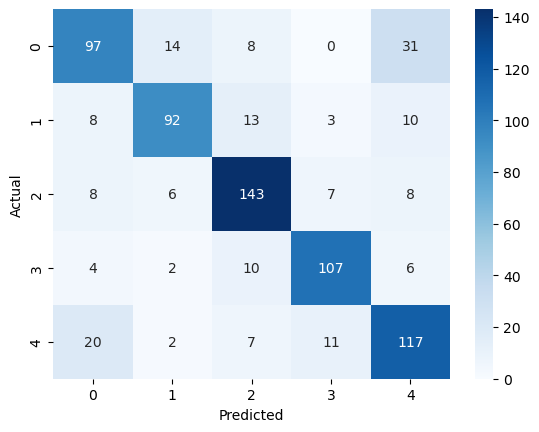

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Overfitting Reduced

After applying data augmentation and dropout layers, the overfitting has been reduced. The training accuracy and validation accuracy are now closer to each other, indicating a better generalization of the model.

- **Training Accuracy**: 99.96594005449592%
- **Validation Accuracy**: 66.07629427792916%

To

- **Training Accuracy**: 92.67711171662125%
- **Validation Accuracy**: 75.74931880108991%

